In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

head - первые пять строк фрейма.

In [3]:
df = pd.DataFrame(['A', 'B', 'B', 'C'], columns=['Col']) 
df.head()

,Col
0,A
1,B
2,B
3,C


In [4]:
df['Col2']=['A','B','R','S']
df['Col3']=['C','P','R','S']
df.head(6)

,Col,Col2,Col3
0,A,A,C
1,B,B,P
2,B,R,R
3,C,S,S


factororize -  получение числового представления массива

In [5]:
pd.factorize(df['Col'])

(array([0, 1, 1, 2], dtype=int64), Index(['A', 'B', 'C'], dtype='object'))

factororize -  получение числового представления массива

In [6]:
pd.factorize(df['Col'])
df['Fact']=pd.factorize(df['Col'])[0]


LabelEncoder - для преобразования категориальных или текстовых данных в числа

In [7]:
le = LabelEncoder()
df['Lab'] = le.fit_transform(df['Col'])
df.head()

,Col,Col2,Col3,Fact,Lab
0,A,A,C,0,0
1,B,B,P,1,1
2,B,R,R,1,1
3,C,S,S,2,2


head - первые пять строк фрейма.

In [8]:
df2 = df.copy()
df2.head()


,Col,Col2,Col3,Fact,Lab
0,A,A,C,0,0
1,B,B,P,1,1
2,B,R,R,1,1
3,C,S,S,2,2


OneHotEncoder - для преобразования категориальных или текстовых данных в числа

In [9]:
encoder=OneHotEncoder(sparse=False)
train_enc=encoder.fit_transform(df2[['Col2','Col3']])
train_X_encoded_col = encoder.get_feature_names(['Col2','Col3'])
train_X_encoded = pd.DataFrame (train_enc,columns=train_X_encoded_col)
#train_X_encoded = pd.DataFrame (train_enc,columns=encoder.categories_)
train_X_encoded.head()

,Col2_A,Col2_B,Col2_R,Col2_S,Col3_C,Col3_P,Col3_R,Col3_S
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


drop - удаления столбцов и строк в дата фрейме. axis=1 - означает столбцы. inplace - вносит изменения в исходный df. сбрасывает
значения.

In [10]:
df2.drop(['Col2','Col3'],axis=1, inplace=True)
OH_X_train= pd.concat([df2, train_X_encoded ], axis=1)
OH_X_train.head()

,Col,Fact,Lab,Col2_A,Col2_B,Col2_R,Col2_S,Col3_C,Col3_P,Col3_R,Col3_S
0,A,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,B,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,B,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,C,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


head - первые пять строк фрейма.

In [11]:
df3 = pd.get_dummies(df2['Col'])
df3.head()

,A,B,C
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1


concat - объединение объектов на определенной оси.
drop - удаление столбца
head - первые пять строк фрейма.
drop - удаления столбцов и строк в дата фрейме.

In [12]:
res=pd.concat([df3, OH_X_train], axis=1)
res.drop(['Col'],axis=1, inplace=True)
res.head()

,A,B,C,Fact,Lab,Col2_A,Col2_B,Col2_R,Col2_S,Col3_C,Col3_P,Col3_R,Col3_S
0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
train_X = pd.DataFrame({'Sex':['male', 'female']*3, 'AgeGroup':['a','b','c','d','a','c']})

head - первые пять строк фрейма.

In [14]:
train_X.head(6)

,Sex,AgeGroup
0,male,a
1,female,b
2,male,c
3,female,d
4,male,a
5,female,c


describe - показывает основные статитические характеристики данных по каждому числовому признаку.

In [15]:
train_X['Sex'].describe(include='object')['top']

'male'

OneHotEncoder - для преобразования категориальных или текстовых данных в числа

In [16]:
encoder=OneHotEncoder(sparse=False)
train = encoder.fit_transform(train_X[['Sex']])
#column_name = encoder.get_feature_names('Sex')
#data =  pd.DataFrame(train, columns= encoder.column_name)
data =  pd.DataFrame(train, columns= encoder.categories_)

head - первые пять строк фрейма.

In [17]:
data.head()

,female,male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


head - первые пять строк фрейма.

In [18]:
train_X1=train_X.copy()
train_X1.head()

,Sex,AgeGroup
0,male,a
1,female,b
2,male,c
3,female,d
4,male,a


info - получения краткой сводки данных. выводит информацию о фрейме данных, включая тип индекса и столбцы, ненулевые значения,
использование памяти.

In [19]:
train_X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
Sex         6 non-null object
AgeGroup    6 non-null object
dtypes: object(2)
memory usage: 176.0+ bytes


## Задание

In [20]:
# Прочтите CSV-файл и преобразуйте "?" в NaN
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
df = pd.read_csv("https://github.com/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/imports-85.data?raw=True",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


info - получения краткой сводки данных. выводит информацию о фрейме данных, включая тип индекса и столбцы, ненулевые значения, 
использование памяти.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

Проверка. isnull - обнаруживает пропущенные значения в данном объекте. Он возвращает логический объект одинакового размера, 
указывающий, являются ли значения NA.
объект для проверки нулевых или осутствующих значений
concat - объединение объектов на определенной оси. проверка на потерянные значения.

In [22]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().mean().round(1)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1).round(1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns


,Missing Values,% of Total Values
symboling,0,0.0
normalized_losses,41,20.0
make,0,0.0
fuel_type,0,0.0
aspiration,0,0.0
num_doors,2,0.0
body_style,0,0.0
drive_wheels,0,0.0
engine_location,0,0.0
wheel_base,0,0.0


Missingno — это библиотека Python, совместимая с Pandas. Установить библиотеку —. pip install missingno.

In [23]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [24]:
import missingno as msno

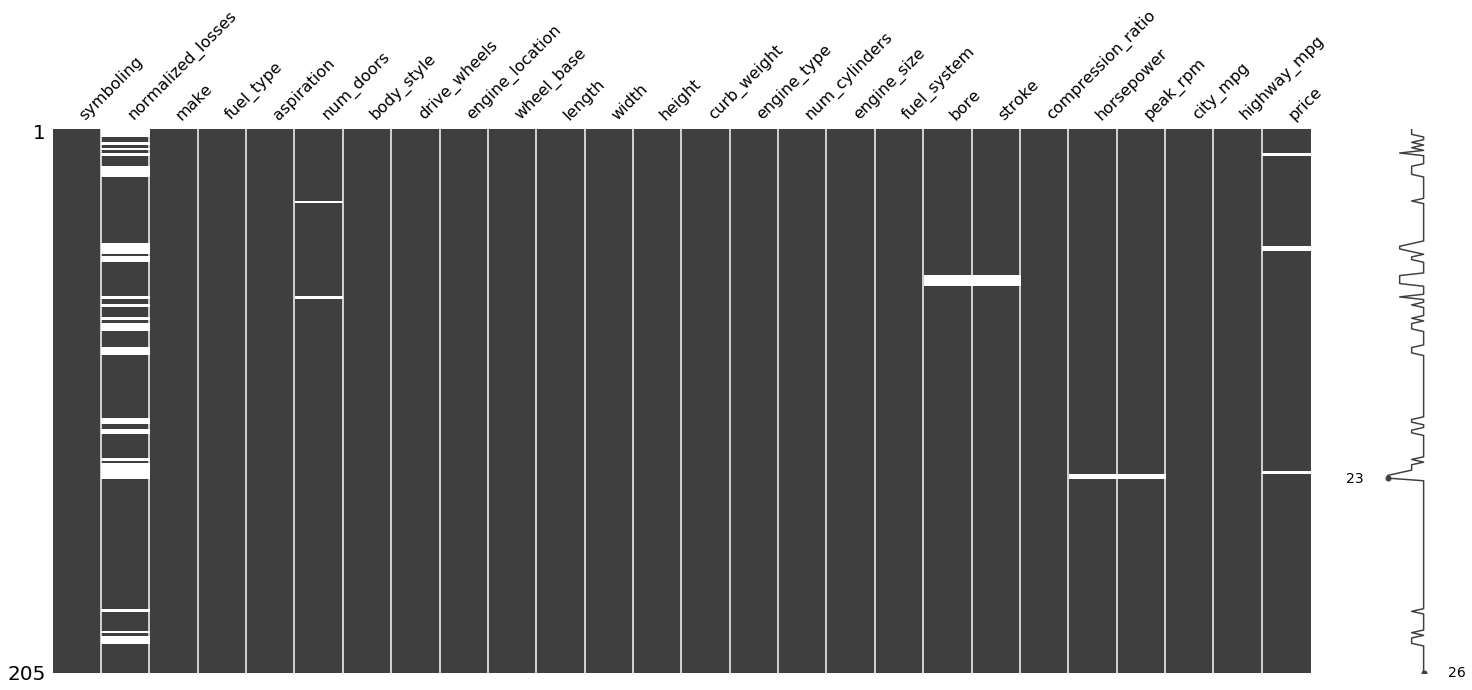

In [25]:
msno.matrix(df)

In [26]:
pip install plotly==5.3.1

Note: you may need to restart the kernel to use updated packages.


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot
#cufflinks.go_offline()

# Cufflinks wrapper on plotly
#import cufflinks



ModuleNotFoundError: No module named 'chart_studio'

In [28]:
plotly.iplot?

Object `plotly.iplot` not found.


head - первые пять строк фрейма.

In [29]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [30]:
#py.iplot(df,kind='box', layout=dict(height=600,yaxis=dict(title='fans'),title='Fans by Publication')

plt.subplots - это функция, которая возвращает кортеж, содержащий объекты фигурры и осей. fig, ax - кортеж в переменые.

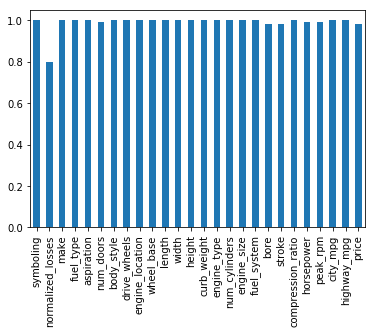

In [31]:
fig, ах= plt.subplots(figsize= ( 6, 4))
(1 - df.isnull().mean()).plot.bar()


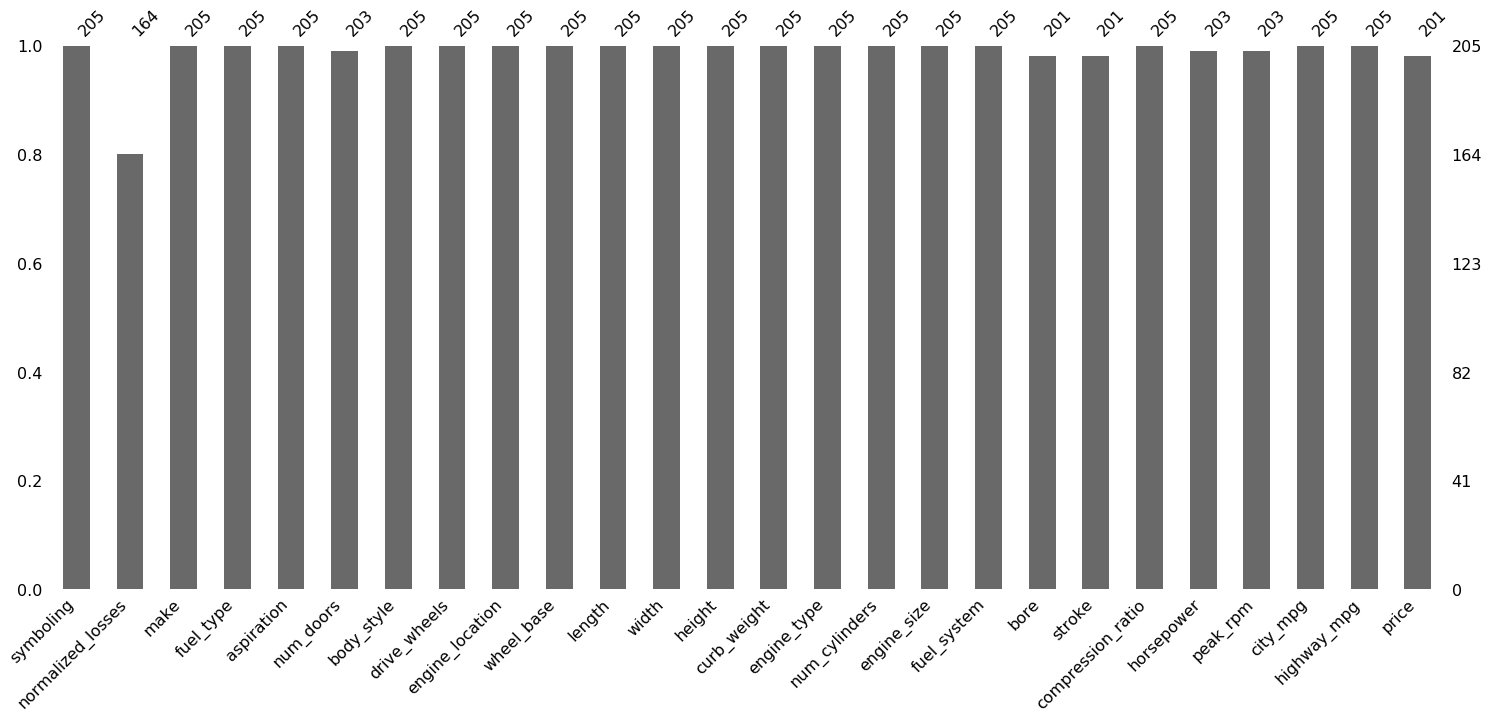

In [32]:
msno.bar(df)

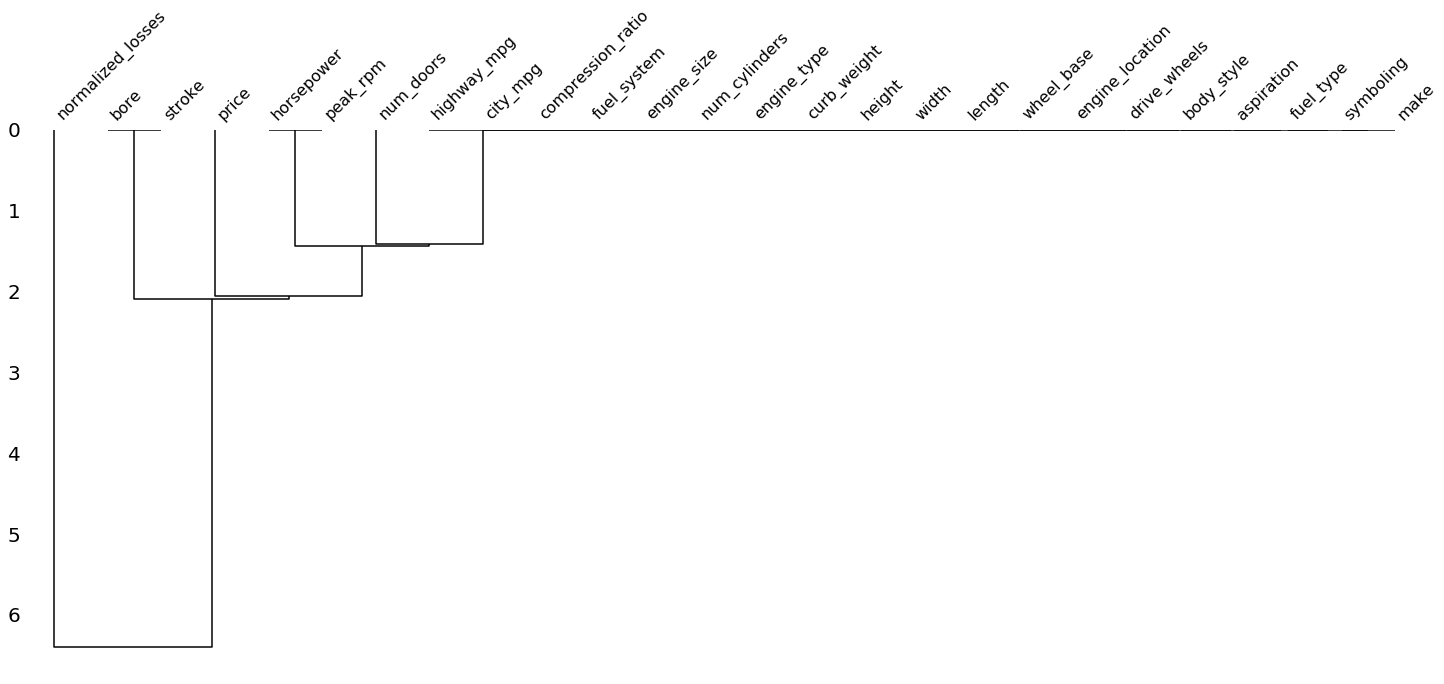

In [33]:
msno.dendrogram(df)

In [34]:
df1 = df.select_dtypes(include=[np.number])

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(5)
memory usage: 25.7 KB


dropna - удаление столбцов с пропущенными значениями 

In [36]:
df=df.dropna(subset=["horsepower"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized_losses    164 non-null float64
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
num_doors            201 non-null object
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null int64
engine_type          203 non-null object
num_cylinders        203 non-null object
engine_size          203 non-null int64
fuel_system          203 non-null object
bore                 199 non-null float64
stroke               199 non-null float64
compression_ratio    203 non-null float64
horsepower           203 non-

SimpleImputer - предоставляет основные стратегии для восстановления отсутствующих значений.

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [38]:
df_imp=df[['bore','stroke']]

imputer -используется для замены отсутствующих значений средним значением каждого столбца, а затем выводит число значений NaN 
в преобразованной матрице.

In [39]:
imputer.fit(df_imp)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [40]:
X = imputer.transform(df_imp)

In [41]:
df[['bore','stroke']]= X

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized_losses    164 non-null float64
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
num_doors            201 non-null object
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null int64
engine_type          203 non-null object
num_cylinders        203 non-null object
engine_size          203 non-null int64
fuel_system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression_ratio    203 non-null float64
horsepower           203 non-

In [2]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

NameError: name 'sns' is not defined

info - получения краткой сводки данных. выводит информацию о фрейме данных, включая тип индекса и столбцы, ненулевые значения, 
использование памяти.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized_losses    164 non-null float64
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
num_doors            201 non-null object
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null int64
engine_type          203 non-null object
num_cylinders        203 non-null object
engine_size          203 non-null int64
fuel_system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression_ratio    203 non-null float64
horsepower           203 non-

describe - показывает основные статитические характеристики данных по каждому числовому признаку.

In [45]:
df.describe(include='object')

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
count,203,203,203,201,203,203,203,203,203,203
unique,21,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,183,166,113,96,118,200,146,157,92


In [48]:
df2=df.copy()
df2

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


describe - показывает основные статитические характеристики данных по каждому числовому признаку.

In [59]:
df.describe(include=object)

,Col
count,4
unique,3
top,B
freq,2


columns - возврата меток столбцов данного фрейма.

In [60]:
df = pd.DataFrame(['А', 'B', 'B', 'C'], columns=['Col'])
df.head()

,Col
0,А
1,B
2,B
3,C


info - получения краткой сводки данных. выводит информацию о фрейме данных, включая тип индекса и столбцы, ненулевые значения,
использование памяти.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
Col    4 non-null object
dtypes: object(1)
memory usage: 112.0+ bytes


describe - показывает основные статитические характеристики данных по каждому числовому признаку.

In [62]:
df.describe(include='object')

,Col
count,4
unique,3
top,B
freq,2
